In [83]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import re

In [202]:
categories_dict = {'0': 'river', '1': 'body of water', '2': 'large aquaduct', '3': 'data station', '4': 'corner', '5': 'End of line', '6': 'Marina', '7': 'Agriculture pond', '8': 'Inlet, contains islands', '9': 'Canal', '10': 'creek', '11': 'Barge stop', '12': 'small aquaduct', '13': 'agriculture creek', '14': 'Bay', '15': 'slough', '16': 'transition length(from diff size flows)', '17':'Ocean'}

In [203]:
River_df = pd.read_csv('RiverNetwork.csv')
River_df.columns=River_df.iloc[0]
River_df = River_df.loc[1:]
River_df = River_df.set_index("NodeID")
River_df['Latitude(North)'] = River_df['Latitude(North)'].astype(float)
River_df['Longitude(West)'] = River_df['Longitude(West)'].astype(float)
River_df['Lat,Long'] = [(River_df['Longitude(West)'][i], River_df['Latitude(North)'][i]) for i in range(len(River_df))]
River_df['Neighbors'] = [np.array(River_df['Neighbors'][i]) for i in range(len(River_df))]

In [77]:
River_df['Neighbors'][0]

array('[2, 3]', dtype='<U6')

In [53]:
print('The range of latitudes are:', max(River_df['Latitude(North)']) - min(River_df['Latitude(North)']))
print('The range of longitudes are:', max(River_df['Longitude(West)']) - min(River_df['Longitude(West)']))

The range of latitudes are: 0.7890985000000015
The range of longitudes are: 1.2106205000000045


In [217]:
### This will ensure that neighbors of nodes are arrays of (Numbers or Strings) as opposed to a string that looks like array
Neighbors_column = []
Neighbors_count_column = []
for i in range(0, 102):
    node_nbors = [int(num) for num in re.findall(r'\b\d+\b', str(River_df['Neighbors'][i]))]
    node_nbors_count = len(node_nbors)
    Neighbors_column.append(node_nbors)
    Neighbors_count_column.append(node_nbors_count)
River_df['Neighbors'] = Neighbors_column
River_df.head(5)

,NaN,Latitude(North),Longitude(West),Neighbors,Category,Name:,Other Categories:,"Lat,Long",Neighbors Count
NodeID,,,,,,,,,
1,NaN,38.570258,-121.511848,"[2, 3]",0,Sacramento River,NaN,"(-121.5118481, 38.5702579)",2
2,NaN,38.560765,-121.516698,"[1, 3]",6,Sacramento marina,NaN,"(-121.5166983, 38.56076507)",2
3,NaN,38.561169,-121.523916,"[2, 1]",9,Barge Canal 1,NaN,"(-121.5239158, 38.5611691)",2
4,NaN,38.562139,-121.549840,"[3, 5]",11,Barge Stop 2,NaN,"(-121.5498401, 38.5621388)",2
5,NaN,38.358281,-121.637045,"[4, 6, 7]",2,SacTown Aqueduct,NaN,"(-121.6370446, 38.3582813)",3


Text(0, 0.5, 'Latitude(North)')

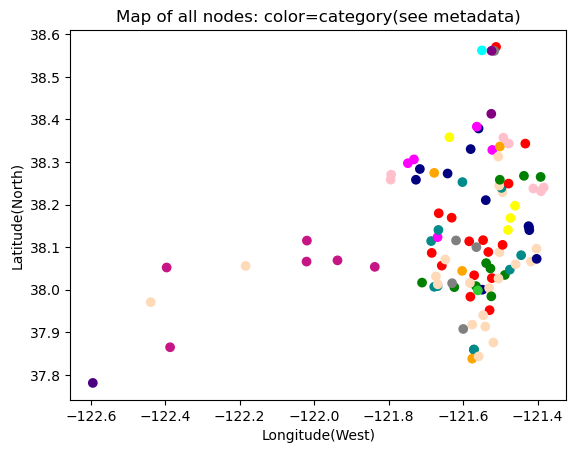

In [180]:
### I am looking to plot these points on plot hopefully they will be properly scattered
colors = {'0' : 'red', '1': 'orange', '2': 'yellow', '3':'olive', '4':'brown', '5':'black', '6':'gray', '7':'limegreen', '8':'green', '9': 'purple', '10': 'pink', '11':'cyan', '12':'navy', '13': 'fuchsia', '14': 'mediumvioletred', '15':'darkcyan', '16':'peachpuff', '17': 'indigo'}
plt.scatter(River_df['Longitude(West)'],River_df['Latitude(North)'], c = River_df['Category'].map(colors))
plt.title('Map of all nodes: color=category(see metadata)')
plt.xlabel('Longitude(West)')
plt.ylabel('Latitude(North)')


In [175]:
### I will now create a network given the data
River_System = nx.Graph()
for nodeID in range(1, 101):
    connections = []
    for neighbor in River_df['Neighbors'][nodeID-1]:
        connections.append((nodeID, neighbor))
    River_System.add_edges_from(connections)

In [176]:
###Simple statistics
print('The average Clustering Coefficient of our graph is:',nx.average_clustering(River_System))
print('The number of nodes we have is:', River_System.number_of_nodes())
print('The numnber of edges we have is:', River_System.number_of_edges())
print('The average degree is:', np.mean(list(dict(River_System.degree()).values())))

The average Clustering Coefficient of our graph is: 0.21992745816275225
The number of nodes we have is: 102
The numnber of edges we have is: 146
The average degree is: 2.8627450980392157


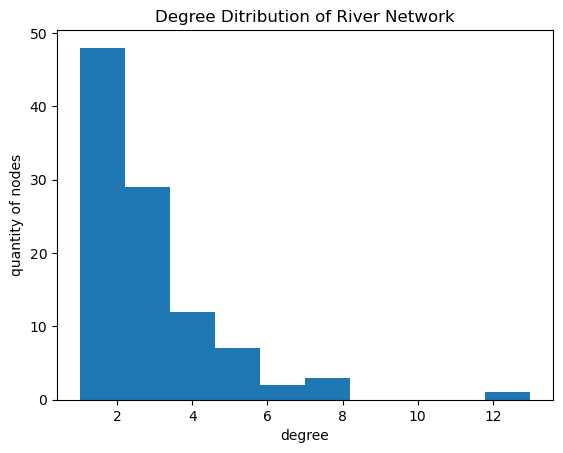

In [177]:
###plot the degree distribution
plt.hist(dict(River_System.degree).values())
plt.title('Degree Ditribution of River Network')
plt.xlabel('degree')
plt.ylabel('quantity of nodes')
plt.show()

Text(0.5, 1.0, 'River Network Visualized')

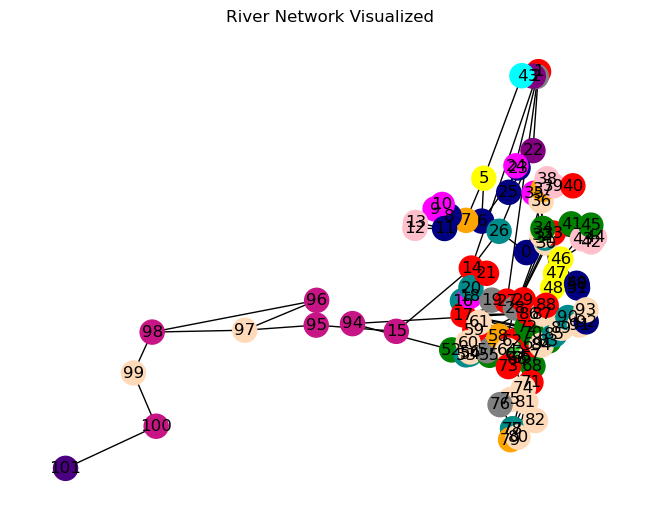

In [178]:
###Draw the network based on locatoin and colors
positions = dict(zip(River_System.nodes, River_df['Lat,Long']))
nx.draw(River_System, positions, node_color = River_df['Category'].map(colors), with_labels = True)
plt.title('River Network Visualized')

In [364]:
River_df['Node Degree'] = dict(River_System.degree()).values()
print('note the Neighbors Count column is false since it is an undirected system, it does not count mutual neighbors in the count...')




note the Neighbors Count column is false since it is an undirected system, it does not count mutual neighbors in the count...


In [278]:
### Create a list of all the hubs!!!!!
hubs_dict = {}
hubs_list = []
for i in range(len(River_df['Category'])):
    if River_df['Node Degree'][i] >= 6:
        hubs_dict[River_df.index[i]] = River_df['Node Degree'][i]
        hub = np.array(River_df.index)[i]
        hubs_list.append(River_df.index[i])
print(hubs_list)

['17', '29', '31', '33', '34', '75']


In [283]:
print('The "hubs" of our system are: ', [River_df['Name:'][i] for i in hubs_list])
hubs_df = River_df[River_df.index.isin(hubs_list)]

The "hubs" of our system are:  ['San Joaquin River', 'Pirates lair marina', 'Dead Horse Cut', 'Mokelume River', 'Delta Cross Channel', 'Old/Middle Connector']


In [285]:
hubs_df

,NaN,Latitude(North),Longitude(West),Neighbors,Category,Name:,Other Categories:,"Lat,Long",Node Degree
NodeID,,,,,,,,,
17,NaN,38.086492,-121.684571,[16],0,San Joaquin River,NaN,"(-121.6845708, 38.0864916)",13
29,NaN,38.100052,-121.564690,"[17, 28]",6,Pirates lair marina,NaN,"(-121.5646898, 38.1000518)",7
31,NaN,38.229293,-121.494266,"[30, 32, 28, 33]",16,Dead Horse Cut,NaN,"(-121.4942657, 38.2292931)",7
33,NaN,38.249310,-121.478266,"[28, 30, 31]",0,Mokelume River,NaN,"(-121.4782663, 38.2493101)",6
34,NaN,38.244591,-121.503439,"[32, 0]",16,Delta Cross Channel,NaN,"(-121.5034386, 38.2445909)",6
75,NaN,37.940179,-121.546559,"[74, 71]",16,Old/Middle Connector,NaN,"(-121.5465585, 37.9401786)",7


Note: Red = San Joaquin River, Blue = Pirates lair marina, Green = Dead Horse Cut, Organe = Mokelume River, Purple = Delta Cross Channel, Black = Old/Middle Connector


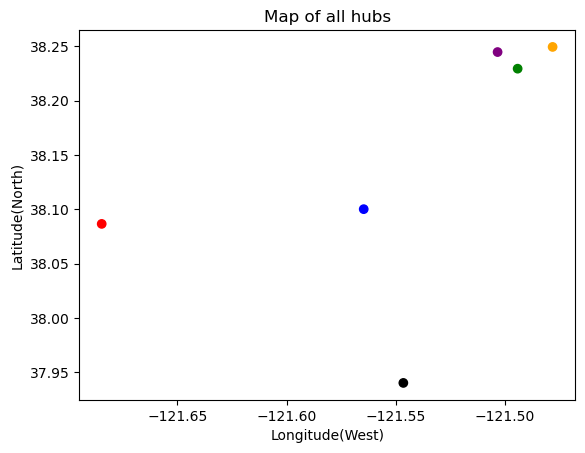

In [318]:
print('Note: Red = San Joaquin River, Blue = Pirates lair marina, Green = Dead Horse Cut, Organe = Mokelume River, Purple = Delta Cross Channel, Black = Old/Middle Connector')
plt.scatter(hubs_df['Longitude(West)'],hubs_df['Latitude(North)'], c = ['red', 'blue', 'green', 'orange', 'purple', 'black'])
plt.title(f'Map of all hubs')
plt.xlabel('Longitude(West)')
plt.ylabel('Latitude(North)')
plt.show()


In [334]:
### Play around with PYVIS, very similar to Gephi as a new way to visualize networks. I am just beginnging but like what I see.
! pip install pyvis

     -------------------------------------- 756.0/756.0 kB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 40.5/40.5 kB ? eta 0:00:00


In [335]:
from pyvis.network import Network

In [347]:
River_network = Network(notebook = True)
River_network.from_nx(River_System)
River_network.show_buttons(filter_ = ['nodes'])
River_network.show('RiverNetwork.html')

RiverNetwork.html


In [354]:
### Start looking at betweenness of our river network

betweenness = nx.centrality.betweenness_centrality(River_System)
River_df['betweenness'] = betweenness.values()
max_between = max(betweenness.values())
print('The node with the max betweenness is shown below')
River_df[River_df['betweenness'] == max_between]

The node with the max betweenness is shown below


,NaN,Latitude(North),Longitude(West),Neighbors,Category,Name:,Other Categories:,"Lat,Long",Node Degree,betweenness
NodeID,,,,,,,,,,
17,NaN,38.086492,-121.684571,[16],0,San Joaquin River,NaN,"(-121.6845708, 38.0864916)",13,0.587347


In [ ]:
###Degree centrality analysis
degree_centrality = nx.degree_centrality(River_System)
plt.figure(2, figsize=(7,7))
coord = nx.spring_layout(River_System)
nx.draw(River_System, nodelist=degree_centrality.keys(), node_size = [d*700 for d in degree_centrality.values()],
        node_color = degree_centrality.values(), font_size = 8, cmap=plt.cm.Reds)

In [ ]:
closeness_centrality = nx.closeness_centrality(River_System)
plt.figure(1, figsize=(7,7))
coord = nx.spring_layout(River_System)
nx.draw(River_System, nodelist=closeness_centrality.keys(), node_size = [d*700 for d in closeness_centrality.values()],
        node_color = closeness_centrality.values(), font_size = 8, cmap=plt.cm.Reds)

In [362]:
River_df['Degree Cent'] = degree_centrality.values()
River_df['closeness_centrality'] = closeness_centrality.values()

In [363]:
River_df

,NaN,Latitude(North),Longitude(West),Neighbors,Category,Name:,Other Categories:,"Lat,Long",Node Degree,betweenness,Degree Cent,closeness_centrality
NodeID,,,,,,,,,,,,
1,NaN,38.570258,-121.511848,"[2, 3]",0,Sacramento River,NaN,"(-121.5118481, 38.5702579)",5,0.093312,0.049505,0.204868
2,NaN,38.560765,-121.516698,"[1, 3]",6,Sacramento marina,NaN,"(-121.5166983, 38.56076507)",3,0.020066,0.029703,0.199211
3,NaN,38.561169,-121.523916,"[2, 1]",9,Barge Canal 1,NaN,"(-121.5239158, 38.5611691)",3,0.030957,0.029703,0.180357
4,NaN,38.562139,-121.549840,"[3, 5]",11,Barge Stop 2,NaN,"(-121.5498401, 38.5621388)",2,0.016601,0.019802,0.159306
5,NaN,38.358281,-121.637045,"[4, 6, 7]",2,SacTown Aqueduct,NaN,"(-121.6370446, 38.3582813)",3,0.132574,0.029703,0.158307
...,...,...,...,...,...,...,...,...,...,...,...,...
98,NaN,38.055937,-122.184262,"[97, 96, 99]",16,Crockett Connector,NaN,"(-122.1842615, 38.0559374)",3,0.038020,0.029703,0.142053
99,NaN,38.052206,-122.396258,[98],14,San Pablo Bay,NaN,"(-122.3962584, 38.0522062)",3,0.058218,0.029703,0.125622
100,NaN,37.970805,-122.439030,"[99, 101]",16,San pablo Straight,NaN,"(-122.4390299, 37.9708048)",2,0.039208,0.019802,0.112222


In [ ]:
### This cell will define a function that will allow for dataframes to be created that have only one type of water feature
def separate_dfs_by_category(df):
    dfs_by_category = []
    for i in range(18):
        df_to_playwith = df.copy()
        df_to_playwith['Category'] = df_to_playwith['Category'].astype(int)
        df_to_playwith = df_to_playwith[df_to_playwith['Category'] == i]
        dfs_by_category.append(df_to_playwith)
    return dfs_by_category

### dfs_by_cat will be big in plotting of different features on maps
dfs_by_cat = separate_dfs_by_category(River_df)

In [ ]:
### for information
total_when_sep = 0
for i in range(18):
    category = str(i)
    len_when_sep = len(dfs_by_cat[i]['Category'])
    print('There are ', len_when_sep, ' features of type:', categories_dict.get(category))
    total_when_sep += len_when_sep
print('this leaves us with a total number of features at:', total_when_sep, '!!BINGO!!')

In [ ]:
for index,category_df in enumerate(dfs_by_cat):
    if len(category_df) == 0:
        print(f'Category {index} has no data')
    else:
        plt.scatter(category_df['Longitude(West)'],category_df['Latitude(North)'])
        plt.title(f'Map of all nodes from Category: {categories_dict.get(str(index))}')
        plt.xlabel('Longitude(West)')
        plt.ylabel('Latitude(North)')
        plt.show()
